
Modules

In [2]:
import biota.steadyfluxes as steady
import matplotlib.pyplot as plt

---------------------------------------------

Specify bioreactor parameters and construct bioreactor class instance from them.
Values are derived from the 20,000 litre stirred aerated tank example case from Humbird https://doi.org/10.31224/osf.io/795su . Fed batch operation is considered here, no perfusion.

In [3]:
workingVolume = 20000
tankDiameter = 2.34
impellerDiameter = tankDiameter/3
rpm = 42.3
backPressure = 1.3
superficialVel = 0.004
moleFracO2 = 0.21
moleFracCO2 = 0.03
initVol = 0.76 * workingVolume
initCells = 4e6
temp = 310
powerNumber = 5
mediumDensity = 1000
mediumViscosity = 9e-4
vesselVolDay = 0.0
perfLactateRate = 5.0
perfAmmrate = 5.0

STR_Humbird_20kl = steady.Bioreactor(wv=workingVolume,t=tankDiameter,d=impellerDiameter,n=rpm,p_back=backPressure,u_s=superficialVel,mf_O2_gas=moleFracO2,mf_CO2_gas=moleFracCO2,v0=initVol,ns=initCells,Temp=temp,
                                     Np=powerNumber,rho=mediumDensity,mu=mediumViscosity,vvd=vesselVolDay,perfAMM=perfAmmrate,perfLAC=perfLactateRate)


-----------------------------------------

Specify cell parameters and create instance of cell class from them. Values are derived from the un-enhanced CHO model of Humbird https://doi.org/10.31224/osf.io/795su for the two doublings production scenario.

In [4]:
growthRate = 0.029

glutamineUptakeRate = 0
glucoseUptakeRate = 0
oxygenUptakeRate = 0.45
uptakeList = [glutamineUptakeRate, glucoseUptakeRate, oxygenUptakeRate]

carbonDioxideProdRate = 0.57
ammoniaProductionRate = 0.092
lactateProductionRate = 0.624
prodList = [carbonDioxideProdRate, ammoniaProductionRate, lactateProductionRate]

massDensity = 1030
cellRadius = 18e-6
wetmass = 3000
dryMassFraction = 0.3

ammoniaLimit = 5
lactateLimit = 50
CO2Limit = 100
turbLengthLimit = 20e-6
limitsList = [ammoniaLimit, lactateLimit, CO2Limit, turbLengthLimit]


cell_Humbird = steady.Cell(mu=growthRate,uptakes=uptakeList,prod=prodList,rho=massDensity,rad=cellRadius,wetmass=wetmass,dmf=dryMassFraction,limits=limitsList)

-------------------------------------------------

Execute production performance function 

In [5]:
(a,b) = steady.yieldModel(STR_Humbird_20kl,cell_Humbird,144,klaInO2=False,tauMIn=False,epsIn=False)

-------------------------------------------------------------------

Dataframe returned by production performance function

In [6]:
a

,Time [hr],Mixing Time [s],Required/Theoretical kLa [-],Required kLa * Mixing Time [-],pCO2 [mbar],Ammonia [mmol/L],Lactate [mmol/L],Superficial Gas Top [m/s],Cell Density [wet g/L]
0,0.000000,105.528229,0.186109,0.144490,9.758607,0.000000,0.000000,0.005321,12.000000
1,0.014401,105.528229,0.186189,0.144553,9.762676,0.004771,0.032358,0.005321,12.005013
2,0.028803,105.528229,0.186269,0.144615,9.766748,0.009543,0.064730,0.005321,12.010028
3,0.043204,105.528229,0.186349,0.144677,9.770821,0.014318,0.097115,0.005321,12.015045
4,0.057606,105.528229,0.186429,0.144739,9.774895,0.019095,0.129514,0.005321,12.020064
...,...,...,...,...,...,...,...,...,...
7978,114.894689,105.528229,41.940538,33.225022,261.476633,308.275963,2090.915230,0.005559,335.913150
7979,114.909091,105.528229,43.473076,34.439386,261.581009,308.409510,2091.821024,0.005559,336.053471
7980,114.923492,105.528229,45.485687,36.034088,261.685424,308.543112,2092.727197,0.005559,336.193850
7981,114.937894,105.528229,48.427303,38.364789,261.789879,308.676771,2093.633748,0.005559,336.334288


-------------------------------------------------

Look at constraints individually to see the limited yield for each of them. Output is in \[wet g/L\].

In [7]:
b

{'CO2': 124.89324158431478,
 'O2': 57.43452616826011,
 'Mixing': 71.03873428927064,
 'Superficial Velocity Top': 336.4747844287421,
 'Stress': 336.4747844287421,
 'Ammonia': 17.257640701419593,
 'Lactate': 19.749995716291345}

--------------------------------------------------------

Plot key constraints against time, in the same format as Figure 2.7 (page 27) of https://doi.org/10.31224/osf.io/795su <br>
Code modified from https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

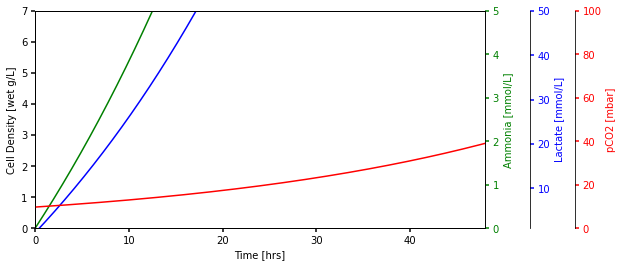

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()


# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))


p1, = ax.plot(a['Time [hr]'],a['Cell Density [wet g/L]'], "black")
p2, = twin1.plot(a['Time [hr]'],a['Ammonia [mmol/L]'], "green")
p3, = twin2.plot(a['Time [hr]'],a['Lactate [mmol/L]'], "blue")
p4, = twin3.plot(a['Time [hr]'],a['pCO2 [mbar]'], "red")

ax.set_xlim(0, 48)
ax.set_ylim(0, 7)
twin1.set_ylim(0, 5)
twin2.set_ylim(1, 50)
twin3.set_ylim(0, 100)


ax.set_xlabel("Time [hrs]")
ax.set_ylabel("Cell Density [wet g/L]")
twin1.set_ylabel("Ammonia [mmol/L]")
twin2.set_ylabel("Lactate [mmol/L]")
twin3.set_ylabel("pCO2 [mbar]")


ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
twin3.tick_params(axis='y', colors=p4.get_color(), **tkw)

ax.tick_params(axis='x', **tkw)

#ax.legend(handles=[p1, p2, p3])

plt.show()

------------------------------